# Data Science Assignment

## Task 1 — Load and Inspect the Dataset
1. Load all CSV files from the provided ZIP archive.
2. Concatenate them into a single DataFrame.
3. Display:
- Shape of the dataset
- List of features
- Value counts for all attack types
4. Convert attack labels into attack families (multi-class target).

Deliverable: A summary of the dataset, sample rows, and label distribution plot.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import math
from sklearn.model_selection import StratifiedKFold


### Load all CSV files from the provided ZIP archive.

In [56]:
df_monday = pd.read_csv('Monday-WorkingHours.pcap_ISCX.csv', encoding='utf-8', low_memory=False)
df_tuesday = pd.read_csv('Tuesday-WorkingHours.pcap_ISCX.csv', encoding='utf-8')
df_wednesday = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv', encoding='utf-8')
df_thursday_morning = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', encoding='utf-8')
df_thursday_afternoon = pd.read_csv('Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', encoding='utf-8')
df_friday_afternoon_ddos = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', encoding='utf-8')
df_friday_afternoon_portscan = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', encoding='utf-8')
df_friday_morning = pd.read_csv('Friday-WorkingHours-Morning.pcap_ISCX.csv', encoding='utf-8')
dfs = [df_monday, df_tuesday, df_wednesday, df_thursday_morning, df_thursday_afternoon, df_friday_afternoon_ddos, df_friday_afternoon_portscan, df_friday_morning]


### Concatenate them into a single DataFrame.

In [57]:
df_combined = pd.concat(dfs, ignore_index=True)

### Display
- Shape of the dataset
- List of features
- Value counts for all attack types

In [58]:
df_combined.shape

(2830743, 79)

In [59]:
df_combined.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [60]:
df_combined.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Label distribution plot

Unique attack types in the dataset:
 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


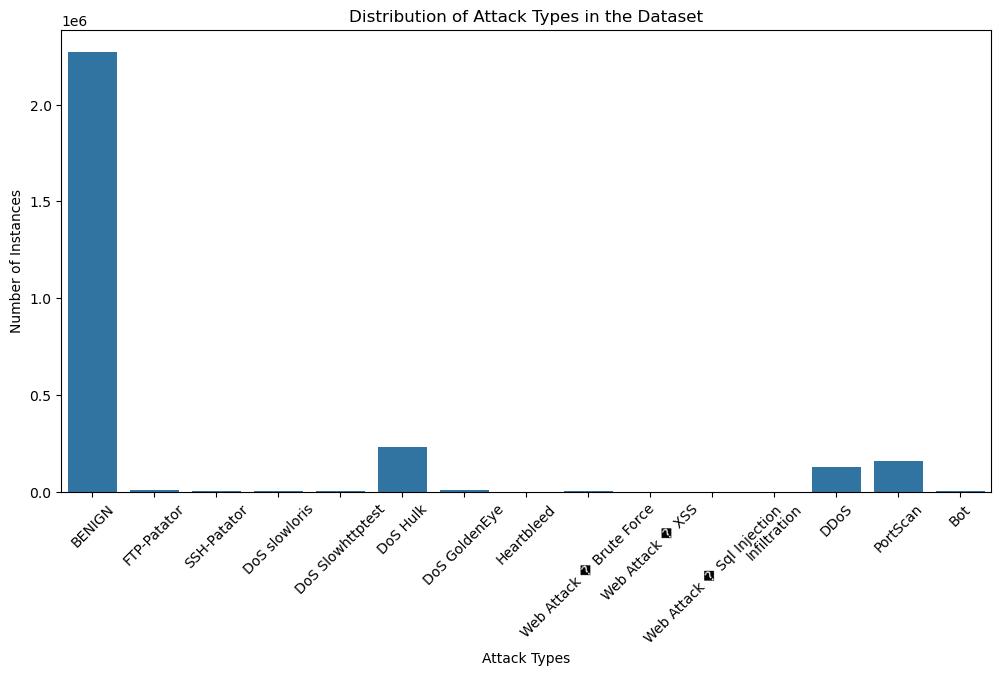

In [61]:
#label distribution plot
attack_types = df_combined[' Label'].unique()
print("Unique attack types in the dataset:")
y_axis = [df_combined[' Label'].value_counts()[attack] for attack in attack_types]
print(df_combined[' Label'].value_counts())

plt.figure(figsize=(12,6))
sns.barplot(x=attack_types, y=y_axis)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Types in the Dataset')
plt.xlabel('Attack Types')
plt.ylabel('Number of Instances')
plt.show()

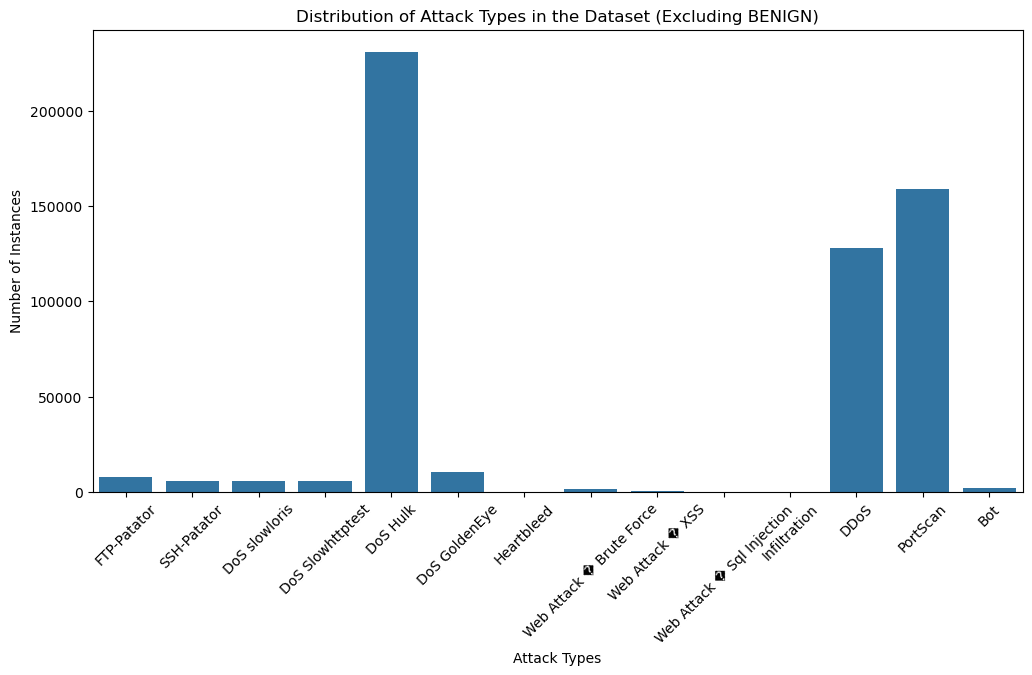

In [62]:
#without BENING
y_axis_no_benign = y_axis[1:]
attack_types_no_benign = attack_types[1:]
plt.figure(figsize=(12,6))
sns.barplot(x=attack_types_no_benign, y=y_axis_no_benign)
plt.xticks(rotation=45)
plt.title('Distribution of Attack Types in the Dataset (Excluding BENIGN)')
plt.xlabel('Attack Types')
plt.ylabel('Number of Instances')
plt.show()

Convert attack labels into attack families (multi-class target). (DoS, DDoS, PortScan, WebAttack, BruteForce, Botnet, Infiltration, BENIGN)

In [ ]:
dos_labels = ["DoS Hulk", "DoS GoldenEye", "DoS slowloris", "DoS Slowhttptest"]
web_attack_labels = ["Web Attack � Sql Injection", "Web Attack � XSS", "Heartbleed", "Web Attack � Brute Force"] #is web attack a web attack or brute force? -- keep as web attack for now
botnet_labels = ["Bot", "Botnet"] 
brute_force_labels = ["FTP-Patator", "SSH-Patator"]
infilteration_labels = ["Infiltration"]
ddos_labels = ["DDoS"]
portscan_labels = ["PortScan"]

def categorize_attack(label):
    if label in dos_labels:
        return "DoS"
    elif label in web_attack_labels:
        return "Web Attack"
    elif label in botnet_labels:
        return "Botnet"
    elif label in brute_force_labels:
        return "Brute Force"
    elif label in infilteration_labels:
        return "Infiltration"
    elif label in ddos_labels:
        return "DDoS"
    elif label in portscan_labels:
        return "PortScan"
    elif label == "BENIGN":
        return "BENIGN"
    else:
        raise ValueError(f"Unknown label: {label}")

df_combined_copy = df_combined.copy()
df_combined[' Label'] = df_combined[' Label'].apply(categorize_attack)



In [64]:
df_combined[' Label'].value_counts()

 Label
BENIGN          2273097
DoS              252661
PortScan         158930
DDoS             128027
Brute Force       13835
Web Attack         2191
Botnet             1966
Infiltration         36
Name: count, dtype: int64

Add label mapping to help the models with interpretability.

In [65]:
label_map =  {'BENIGN': 0, 'DoS': 1, 'Web Attack': 2, 'Botnet': 3, 'Brute Force': 4, 'Infiltration': 5, 'DDoS': 6, 'PortScan': 7}
df_combined[' Label'] = df_combined[' Label'].map(label_map)

## Task 2 — Exploratory Data Analysis (EDA)

### 2.1 Descriptive statistics
- Summary statistics (mean, median, std)
- Missing value analysis
- Outlier detection (boxplots or IQR method)

Summary statistics (mean, median, std)

In [66]:
df_combined.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06,7.768748e-01
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07,1.988175e+00
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08,7.000000e+00


In [67]:
#columns with high stddev
stddev = df_combined.drop(' Label', axis=1).std().sort_values(ascending=False)
print("Columns with high standard deviation:")
stddev_cols = stddev[stddev > 1e6].index.tolist()
print(stddev_cols)


Columns with high standard deviation:
[' Flow Duration', 'Fwd IAT Total', 'Bwd IAT Total', ' Fwd IAT Max', ' Flow IAT Max', ' Idle Max', 'Idle Mean', ' Idle Min', ' Fwd Header Length.1', ' Fwd Header Length', ' Bwd IAT Max', ' Fwd IAT Std', ' Fwd IAT Mean', ' Bwd IAT Mean', ' Fwd IAT Min', ' Bwd IAT Min', ' Flow IAT Std', ' Bwd IAT Std', ' Idle Std', ' Flow IAT Mean', ' Flow IAT Min', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes', ' Packet Length Variance', ' Bwd Header Length', ' min_seg_size_forward', ' Active Max']


Missing value analysis

In [68]:
nan_counts = df_combined.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
print("Columns with NaN:")
print(nan_counts)
print("Percentage of NaN values in the dataset:")
print(nan_counts / len(df_combined) * 100)



Columns with NaN:
Flow Bytes/s    1358
dtype: int64
Percentage of NaN values in the dataset:
Flow Bytes/s    0.047973
dtype: float64


Outlier detection (boxplots or IQR method)

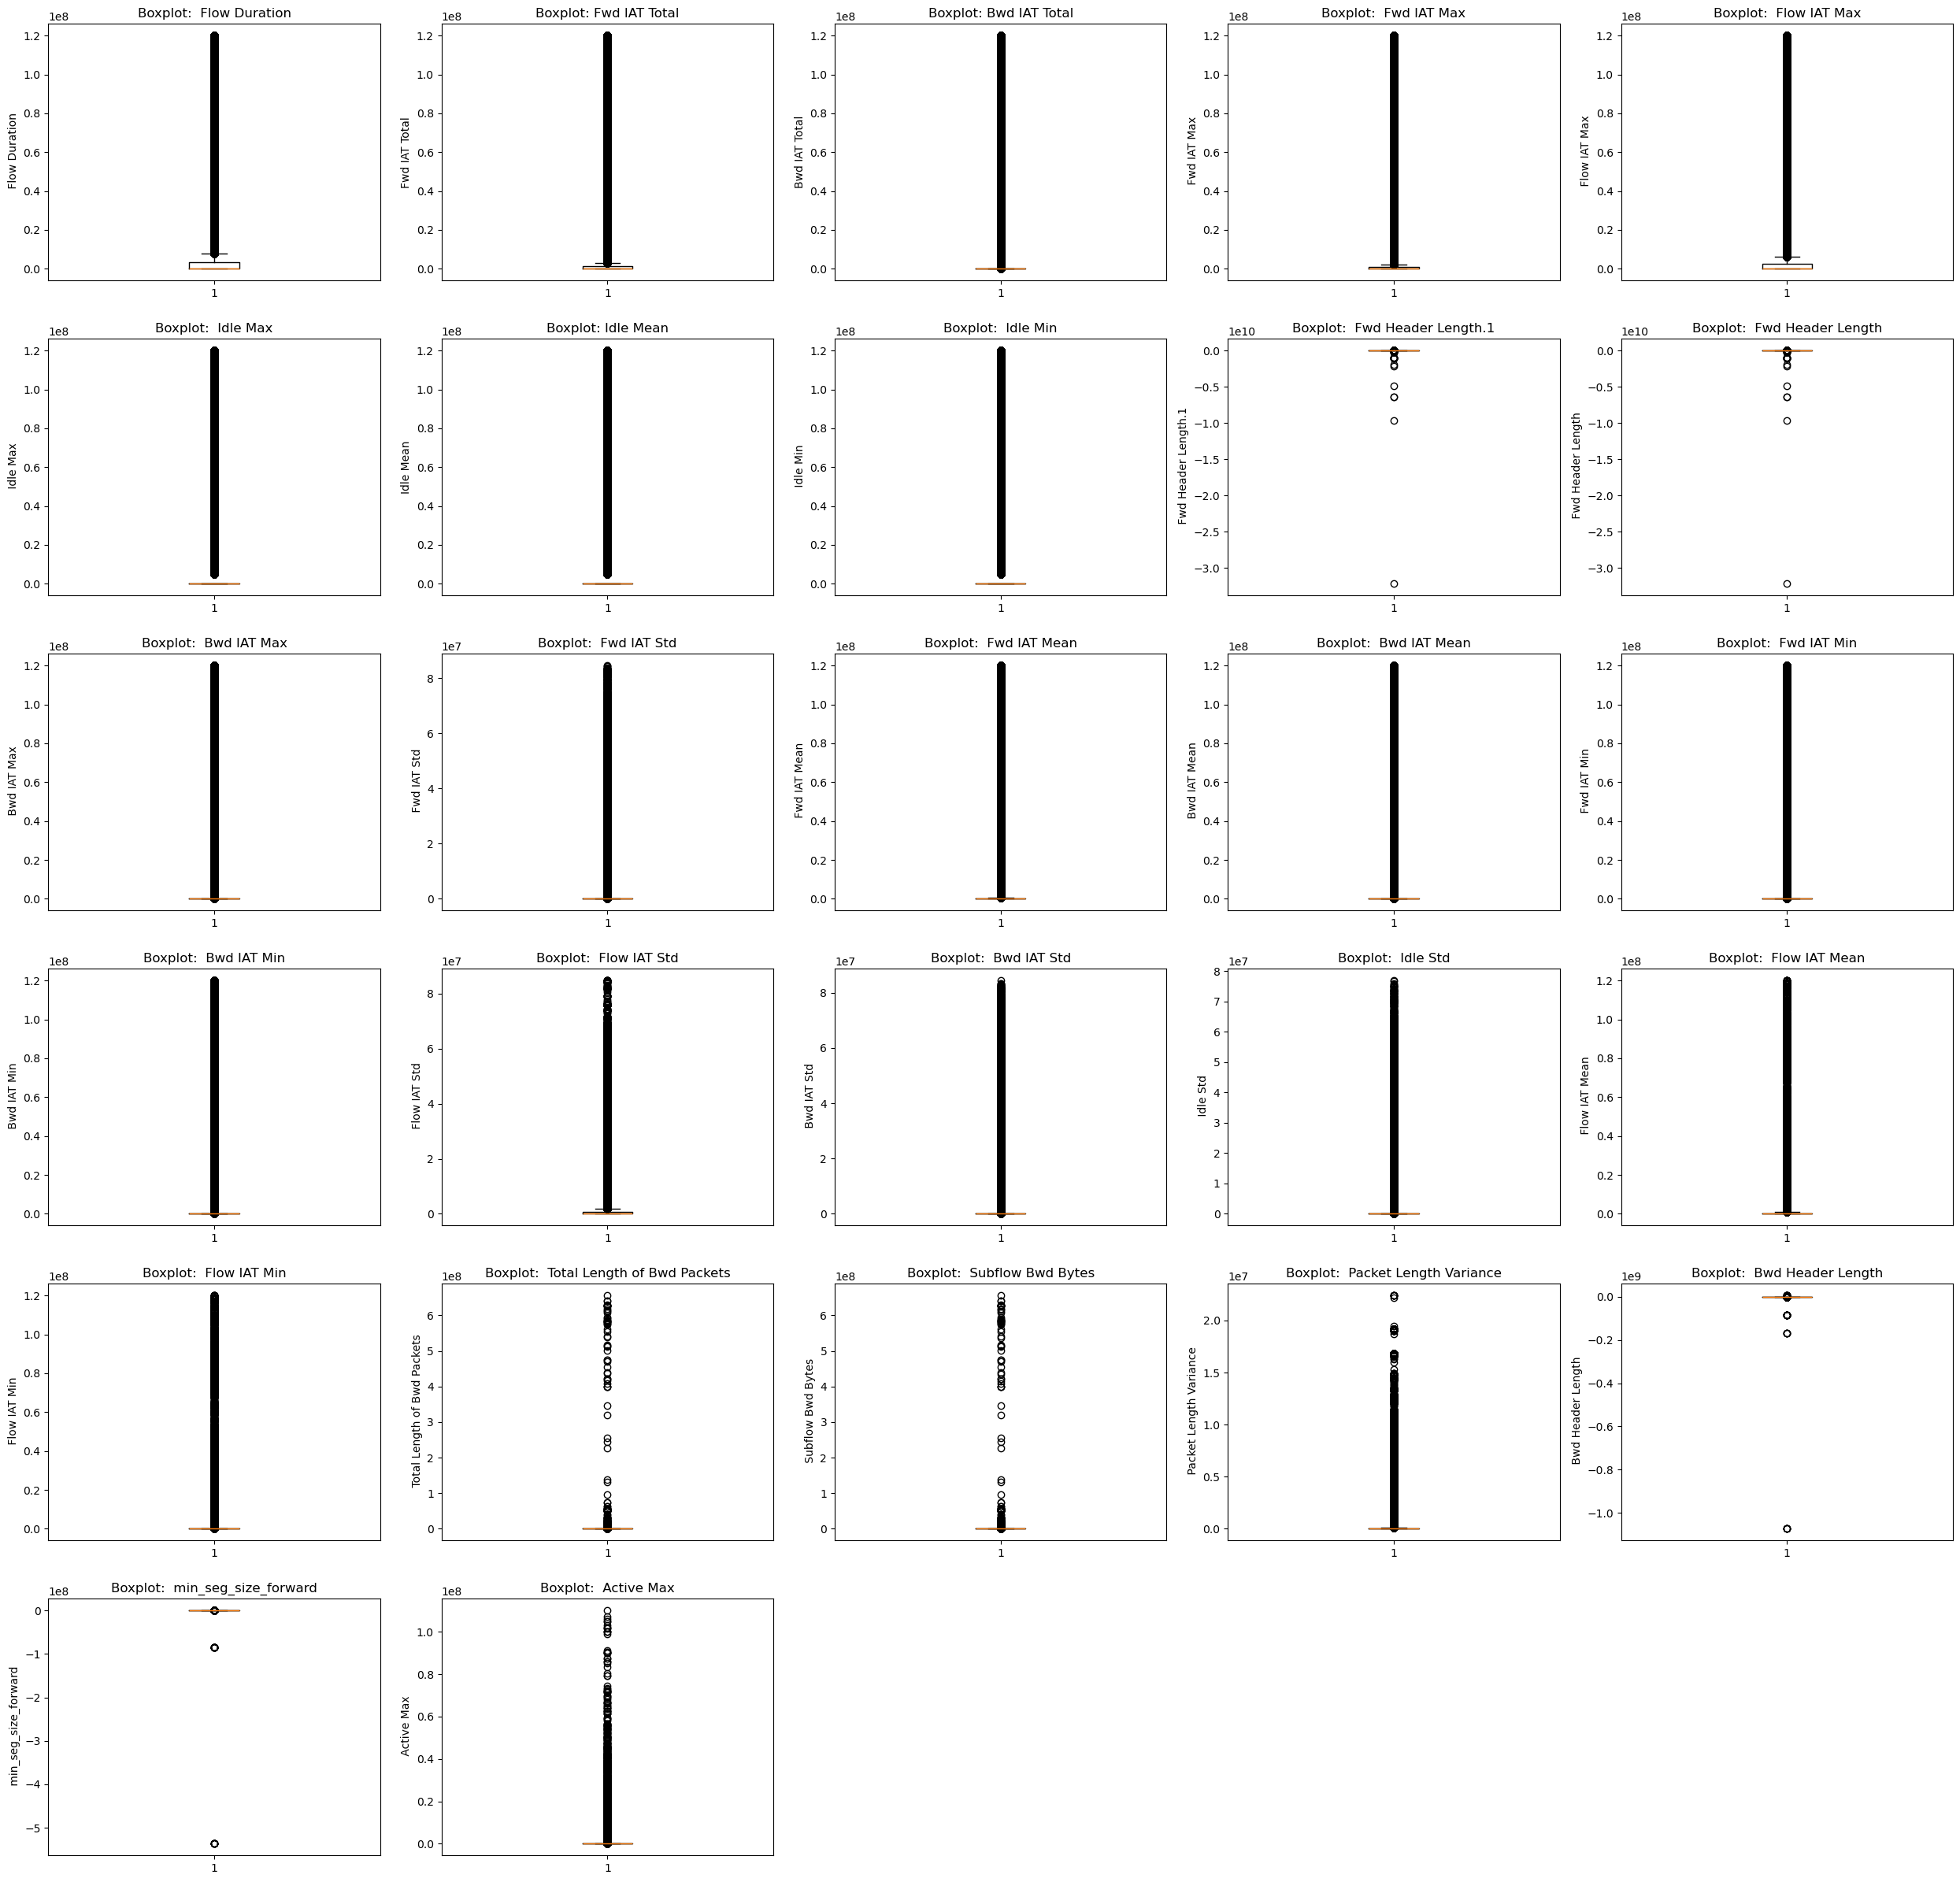

In [69]:


n_features = len(stddev_cols)
n_cols =5
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(stddev_cols):
    ax = axes[i]
    ax.boxplot(df_combined[feature].dropna())
    ax.set_title(f'Boxplot: {feature}')
    ax.set_ylabel(feature)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.2 Univariate analysis
- Distribution of key traffic features (histograms)
- Correlation matrix, Causality analysis and heatmap

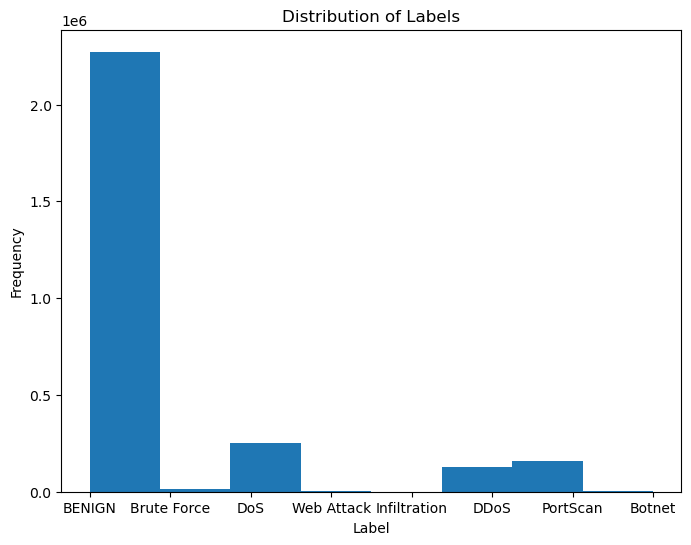

In [70]:

x_axis = df_combined[' Label'].map({v: k for k, v in label_map.items()})
plt.figure(figsize=(8, 6))
plt.hist(x_axis, bins=len(label_map))
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

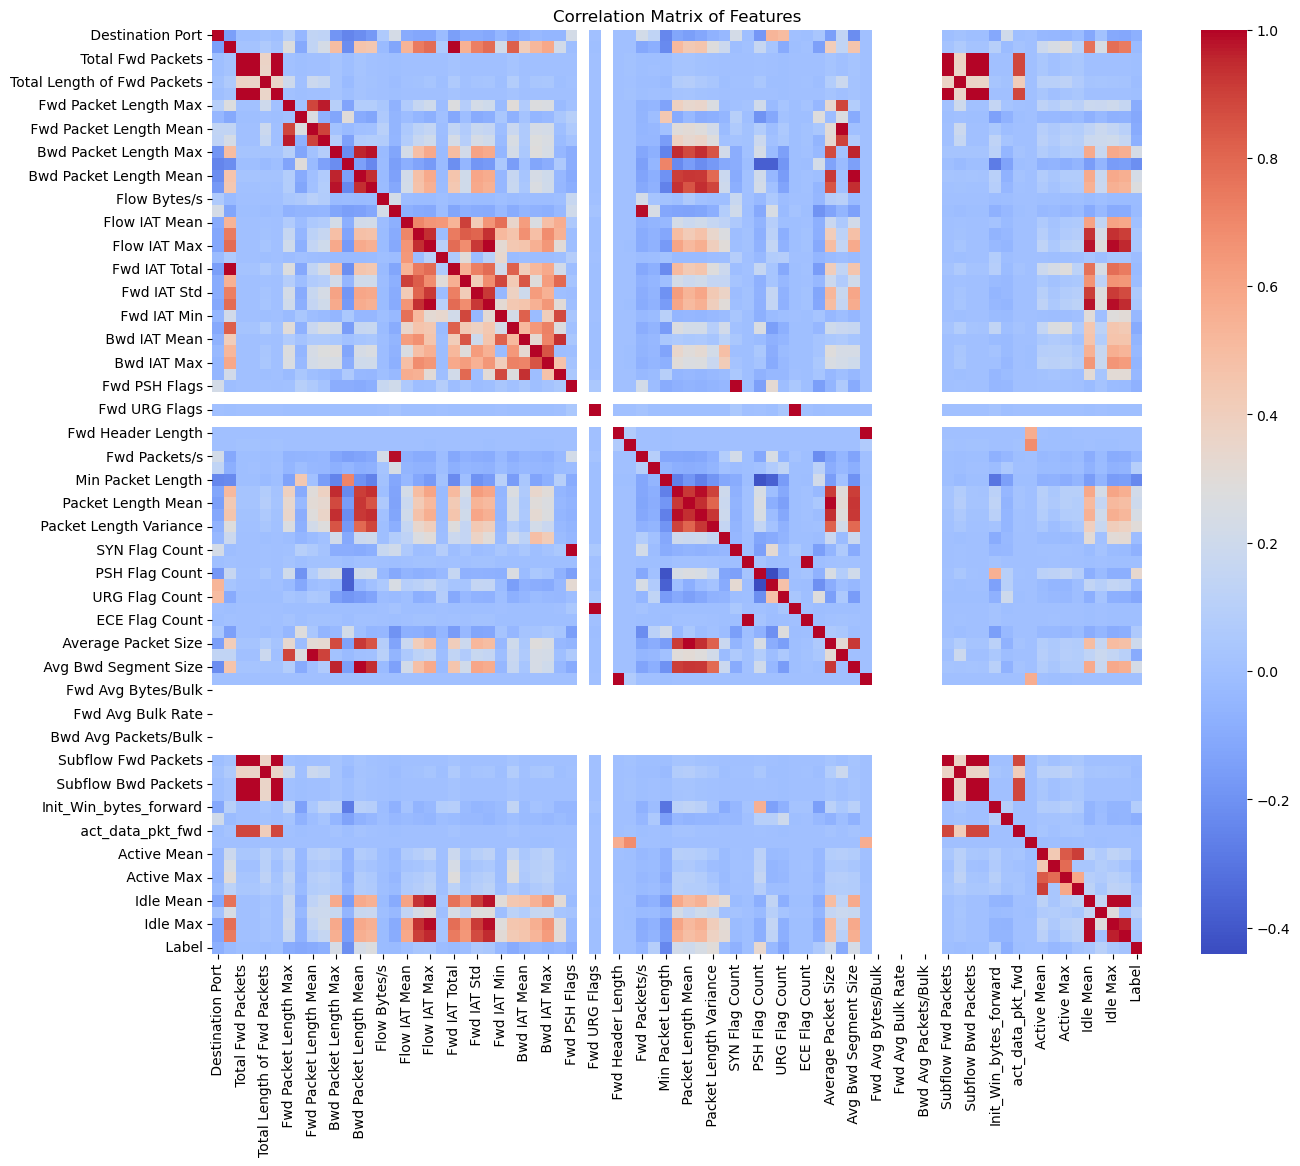

In [71]:

corr_matrix = df_combined.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()

In [72]:
top_10_features = corr_matrix[' Label'].abs().sort_values(ascending=False).head(11).index.tolist()
top_10_features.remove(' Label')
top_10_features

[' PSH Flag Count',
 ' Packet Length Variance',
 ' Bwd Packet Length Std',
 ' Packet Length Std',
 'Bwd Packet Length Max',
 ' Min Packet Length',
 ' Bwd Packet Length Mean',
 ' Avg Bwd Segment Size',
 ' Bwd Packet Length Min',
 ' Max Packet Length']

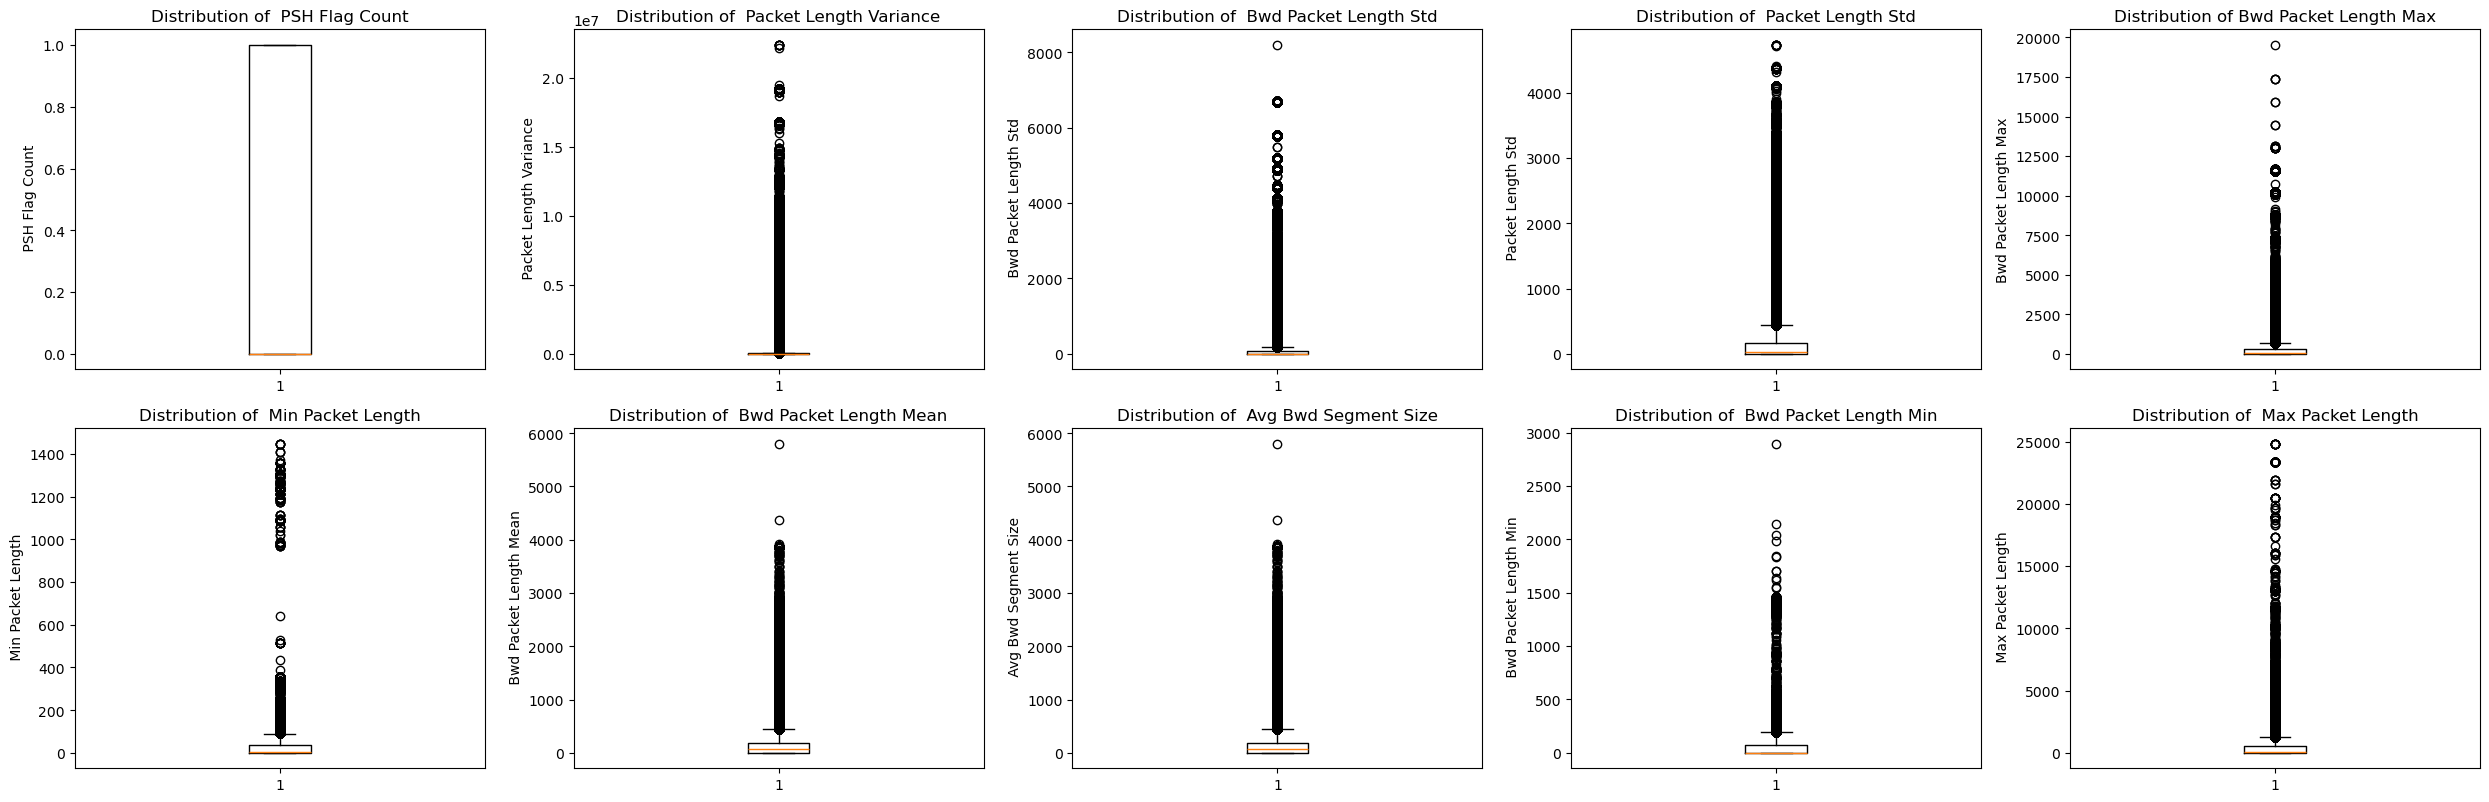

In [73]:

n = len(top_10_features)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows), sharey=False)
axes = axes.flatten()

for i, feature in enumerate(top_10_features):
    ax = axes[i]
    ax.boxplot(df_combined[feature].dropna())
    ax.set_title(f'Distribution of {feature}')
    ax.set_ylabel(feature)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2.3 Multivariate analysis
- Pairplots for a subset of features
- PCA visualization (2D or 3D)
- Discussion: Are attack families separable?

Pairplots for a subset of features

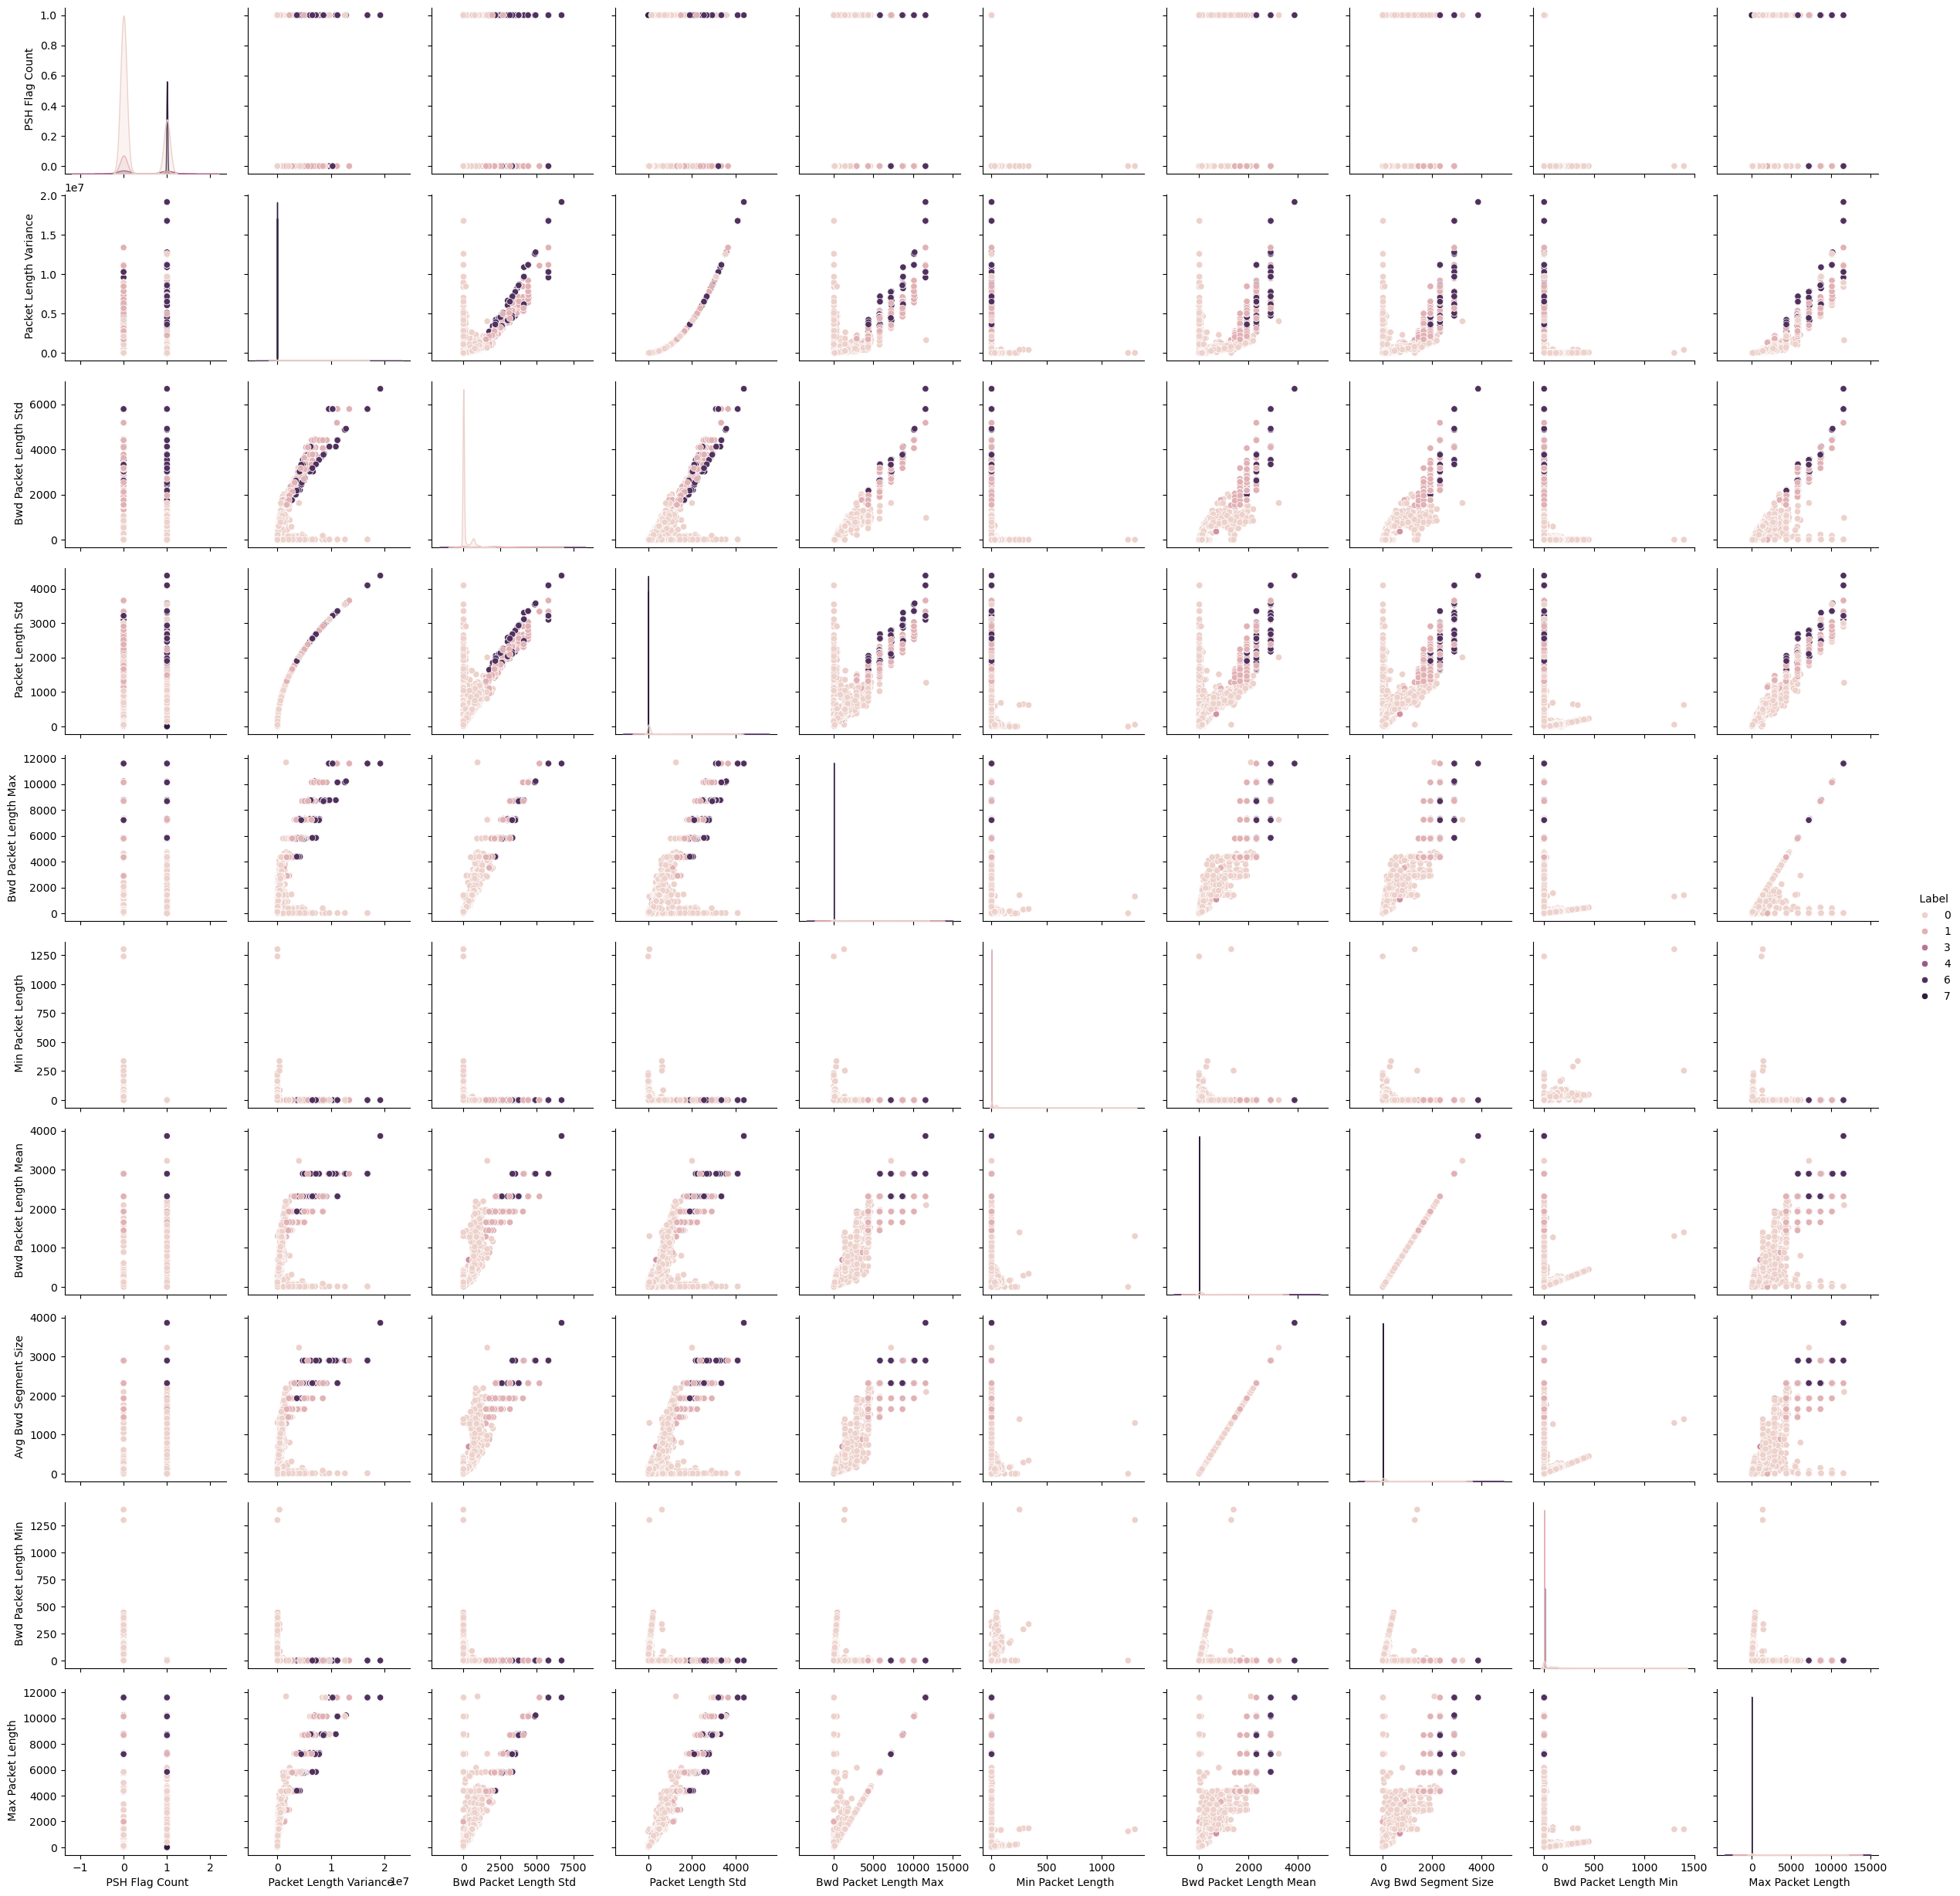

In [74]:
sample_size = 10000
df_sampled = df_combined.sample(n=min(sample_size, len(df_combined)), random_state=42)
sns.pairplot(df_sampled, hue=' Label', vars=top_10_features)

PCA visualization (2D or 3D)

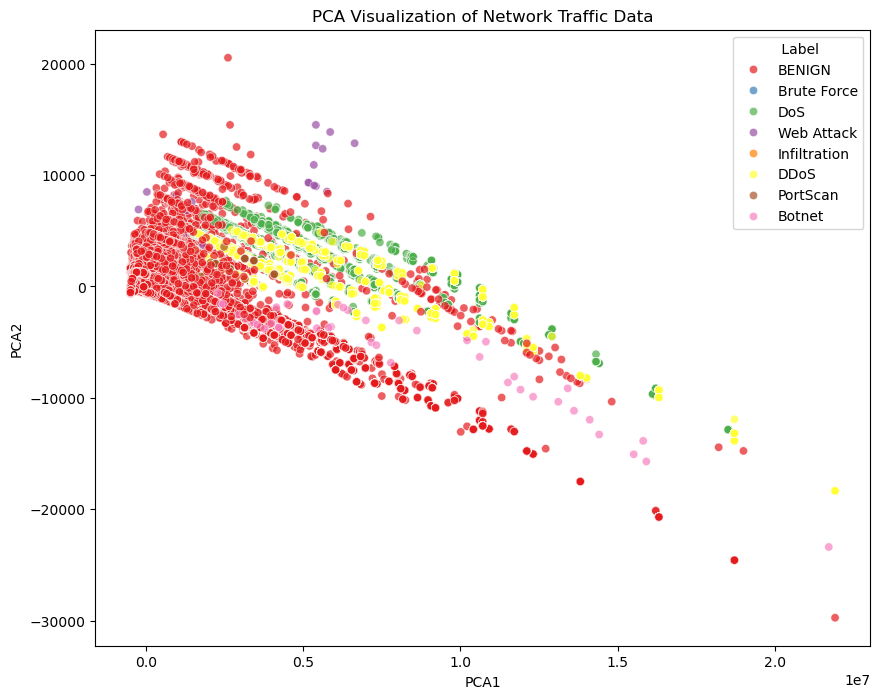

In [75]:

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_combined[top_10_features].fillna(0))

df_combined['PCA1'] = pca_result[:, 0]
df_combined['PCA2'] = pca_result[:, 1]
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_combined, x='PCA1', y='PCA2', hue=df_combined[' Label'].map({v: k for k, v in label_map.items()}), palette='Set1', alpha=0.7)
plt.title('PCA Visualization of Network Traffic Data')
plt.show()

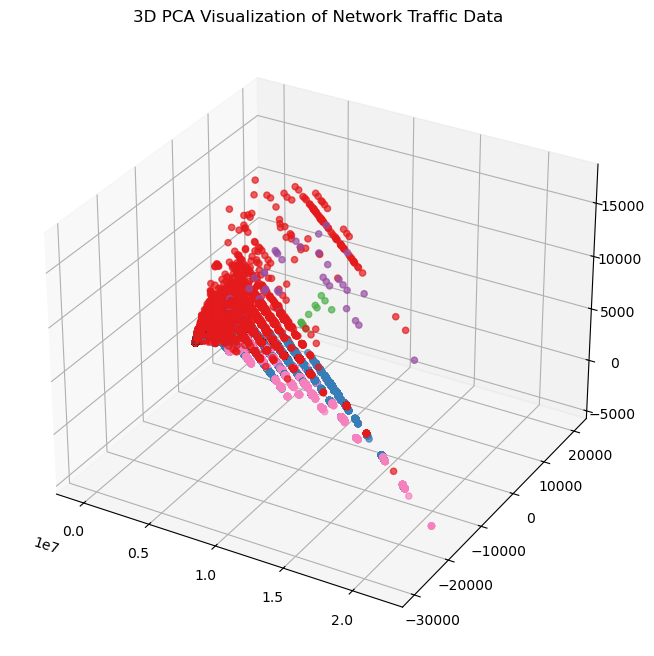

In [76]:

pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(df_combined[top_10_features].fillna(0))
df_combined['PCA3'] = pca_result_3d[:, 2]
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_combined['PCA1'], df_combined['PCA2'], df_combined['PCA3'], c=df_combined[' Label'], cmap='Set1', alpha=0.7)
ax.set_title('3D PCA Visualization of Network Traffic Data')
plt.show()

##### Discussion: Are attack families separable?

> Answer: According to the above PCA analysis, some attack families (Benign, DoS, Infiltration, DDos, PortScan) are overlapping a lot, which suggests it is hard to classify certain classes. Some classes (Botnet, Web Attack), however are distinguishable and can be seperated easily from the mass.


#### Deliverable: Figures + interpretation of patterns found in the data.

##### 1. Class distribution of label
BENIGN traffic dominates the dataset. Attack classes are heavily underrepresented, with some (e.g Infiltration) having very few instances. This will mean that the models may show high accuracy by simply predicting BENIGN for most samples and therefore minority attack classes risk being misclassified.

##### 2. Feature Variance and Outliers
Network traffic features have high variance with heavy outliers, particularly in byte/packet count features (e.g., Total Fwd Packets, Total Length of Fwd Packets). Due to this, distance based models will not work well.

##### 3. Feature Correlations
High multicollinearity exists between related features, which neccessitates feature reduction.

##### 4. Missing Data
The features Flow Bytes/s and Flow Packets/s contain infinite values and missing data.

##### 5. Class Separability
Botnet and Web Attack form distinct clusters in PCA space, but BENIGN, DoS, DDoS, PortScan, and Infiltration overlap significantly.

##### 6. Top Predictive Features (from Correlation Analysis)
Features most correlated with labels include: Flow duration metrics, Packet length statistics (mean, min, max), Inter-arrival times, Flag counts. These features should be prioritized in feature selection.

## Task 3 — Feature Engineering

Perform feature transformations, including:

1. Cleaning (remove/replace ∞ values, handle NaN)
2. Scaling (StandardScaler or MinMaxScaler)
3. Feature selection:
   - Sequential Forward Selection
   - Sequential Backward Selection
   - Bidirectional Selection
4. Dimensionality reduction: PCA (retain 95% variance or fixed k)
   
Deliverable: Explain and justify your engineered feature set.

### Cleaning (remove/replace ∞ values, handle NaN) + remove duplicates
- Removed Infinite values by replacing them with NaN values
- Used Mean Imputation for NaN values

In [ ]:
df_cleaned = df_combined.copy()

inf_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
inf_cols = df_cleaned[inf_cols].columns[df_cleaned[inf_cols].isin([np.inf, -np.inf]).any()]

print("Columns with Inf values replaced by NaN:", inf_cols.tolist())

#remove inf values by  making them nan
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan)

In [ ]:
#imputation

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
cols_to_impute = df_cleaned.columns[df_cleaned.isna().any()].tolist()
df_cleaned[cols_to_impute] = imputer.fit_transform(df_cleaned[cols_to_impute])


print("Verification, remaining NaNs:", df_cleaned.isna().sum().sum())

In [ ]:
duplicates = df_cleaned.duplicated()
duplicate_count = duplicates.sum()

print(f"Num of duplicate rows: {duplicate_count}")

df_cleaned = df_cleaned.drop_duplicates(keep='first')
del duplicates
print("Cleaned data shape:", df_cleaned.shape)

### Scaling (StandardScaler or MinMaxScaler)

In [79]:
scaler = StandardScaler()
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.difference([' Label'])
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

### Feature selection

In [80]:



sample_size = min(5000, len(df_cleaned))
min_samples_per_class = 20

df_sampled = df_cleaned.groupby(' Label', group_keys=False).apply(
    lambda x: x.sample(
        n=max(min_samples_per_class, int(sample_size * len(x) / len(df_cleaned))), 
        random_state=42,
        replace=(len(x) < min_samples_per_class)
    )
) #sample with replacement if class has less than min_samples_per_class

X = df_sampled.drop(' Label', axis=1)
y = df_sampled[' Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) #stratify means maintain class distribution
print("Class distribution after sampling:")
print(y.value_counts().sort_index())

lr = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42, class_weight='balanced')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
sfs = SequentialFeatureSelector(lr, n_features_to_select=10, direction='forward', scoring='f1_macro', cv=cv)
sfs.fit(X_train, y_train) 
selected_features = X_train.columns[sfs.get_support()].tolist()
print("Selected features from forward feature selection:")
print(selected_features)


C:\Users\Weebmachine\AppData\Local\Temp\ipykernel_16556\1346176181.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_cleaned.groupby(' Label', group_keys=False).apply(


Class distribution after sampling:
 Label
0    4015
1     446
2      20
3      20
4      24
5      20
6     226
7     280
Name: count, dtype: int64
Selected features from forward feature selection:
[' Destination Port', ' Fwd Packet Length Max', ' Bwd Packet Length Min', ' Flow IAT Max', 'Fwd IAT Total', ' Bwd Packets/s', ' PSH Flag Count', ' act_data_pkt_fwd', ' Idle Max', 'PCA3']


#### Dimensionality reduction: PCA (retain 95% variance or fixed k)

In [81]:
pca_95 = PCA(n_components=0.95, random_state=42)
X_pca = pca_95.fit_transform(X)
print(f"PCA components: {pca_95.n_components_}")
print(f"Explained variance ratio: {pca_95.explained_variance_ratio_.sum():.4f}")
X_final_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(pca_95.n_components_)], index=X.index)

PCA components: 18
Explained variance ratio: 0.9505



#### Deliverable: Explain and justify your engineered feature set.

##### 1. Cleaning
Replaced inf values with NaN to prevent computational errors, then removed features with >10% missing values to avoid imputation bias. Remaining Nan values were filled with column means, preserving data distribution and also maintaining dataset size<br>
Removing heavily corrupted features prevents noise while mean imputation gives reasonable estimates for sparse missing data.

##### 2. Scaler
Applied z-score normalization to all numerical features via standardscaler. The features have high variance and many outliers (as seen in the above EDA boxplots). StandardScaler preserves outlier information.

##### 3. Feature Selection (SFS)
Used Logistic Regression with macro f1 scoring. The wrapper method in SFS is computationally fast with stratified sampling (5000 samples), that makes sure each class has a minimum distribution. In the end, it reduces dimensionality from ~70+ features to 10 features.<br>
Since BENING dominates the target class, there is an imbalanced class distribution, which is why I've used SFS with `class_weight='balanced'` and stratified CV. The forward direction is also less computationally expensive than backward or bidirectional for large feature spaces.

##### 4. Dimensionality Reduction (PCA - 95% variance)
Reduced to principal components retaining 95% variance. While SFS provides interpretable features, PCA captures variance. PCA loses interpretability but may improve generalization by removing multicollinearity<br>
PCA serves as a comparison baseline. If PCA features outperform SFS features, it suggests redundancy in original features. If SFS performs better, domain-specific features are more informative than variance-maximizing projections.

## Task 4 — Multi-Class Classification Models

Implement at least three different classifiers, such as:

- Decision Tree
- Naive Bayes
- k-NN
  
Train each model on the same training set and evaluate with:

- Accuracy
- Macro-F1 score
- Per-class recall
  
Deliverable: A comparison table and discussion of the strengths and weaknesses of each model.

In [82]:

decision_tree = DecisionTreeClassifier(random_state=42)
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
models = [decision_tree, naive_bayes, knn]


Evaluating models on SBS
DecisionTreeClassifier Accuracy: 0.9762532981530343
DecisionTreeClassifier F1 Score: 0.7061552650225029
DecisionTreeClassifier Recall: 0.7559396160264433
DecisionTreeClassifier Recall for class BENIGN: 0.9803600654664485
DecisionTreeClassifier Recall for class DoS: 0.9338235294117647
DecisionTreeClassifier Recall for class Web Attack: 0.3333333333333333
DecisionTreeClassifier Recall for class Botnet: 0.8
DecisionTreeClassifier Recall for class Brute Force: 1.0
DecisionTreeClassifier Recall for class Infiltration: 0.0
DecisionTreeClassifier Recall for class DDoS: 1.0
DecisionTreeClassifier Recall for class PortScan: 1.0


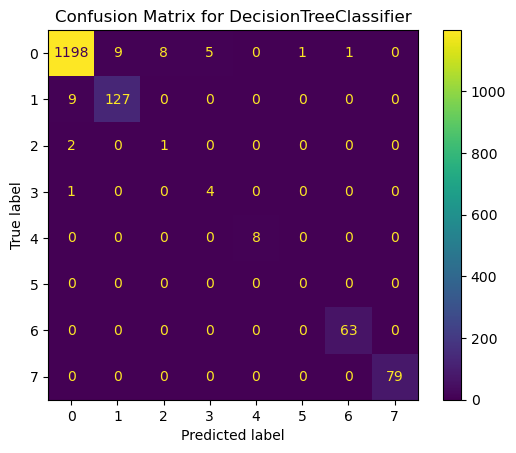


--------------------------------------------------
GaussianNB Accuracy: 0.5600263852242744
GaussianNB F1 Score: 0.4773096150060758
GaussianNB Recall: 0.6330568076930717
GaussianNB Recall for class BENIGN: 0.5032733224222586
GaussianNB Recall for class DoS: 0.6691176470588235
GaussianNB Recall for class Web Attack: 0.6666666666666666
GaussianNB Recall for class Botnet: 0.4
GaussianNB Recall for class Brute Force: 1.0
GaussianNB Recall for class Infiltration: 0.0
GaussianNB Recall for class DDoS: 0.8253968253968254
GaussianNB Recall for class PortScan: 1.0


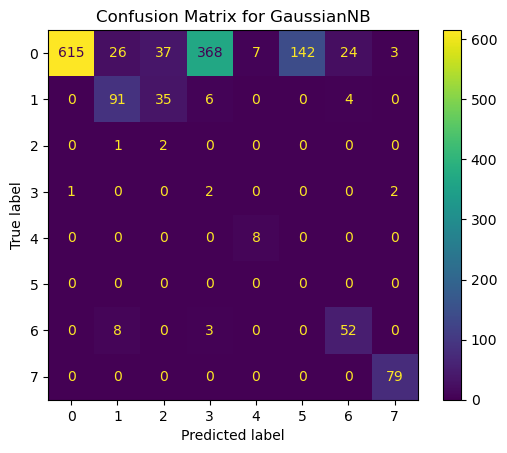


--------------------------------------------------
KNeighborsClassifier Accuracy: 0.9538258575197889
KNeighborsClassifier F1 Score: 0.6435843475995445
KNeighborsClassifier Recall: 0.6689752598643854
KNeighborsClassifier Recall for class BENIGN: 0.9639934533551555
KNeighborsClassifier Recall for class DoS: 0.9191176470588235
KNeighborsClassifier Recall for class Web Attack: 0.3333333333333333
KNeighborsClassifier Recall for class Botnet: 0.4
KNeighborsClassifier Recall for class Brute Force: 0.875
KNeighborsClassifier Recall for class Infiltration: 0.0
KNeighborsClassifier Recall for class DDoS: 0.873015873015873
KNeighborsClassifier Recall for class PortScan: 0.9873417721518988


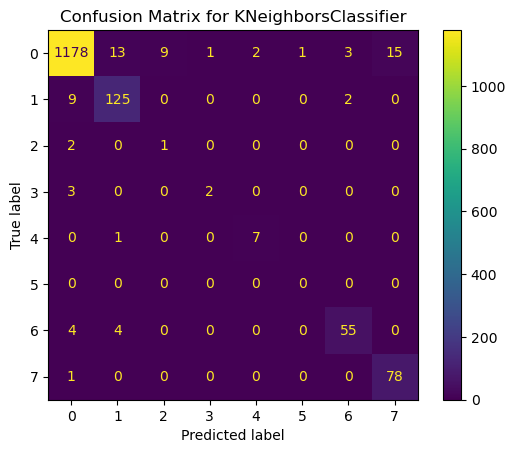


--------------------------------------------------

Evaluating models on PCA
DecisionTreeClassifier Accuracy: 0.966358839050132
DecisionTreeClassifier F1 Score: 0.6569239029500472
DecisionTreeClassifier Recall: 0.6830582763725557
DecisionTreeClassifier Recall for class BENIGN: 0.9795417348608838
DecisionTreeClassifier Recall for class DoS: 0.9264705882352942
DecisionTreeClassifier Recall for class Web Attack: 0.6666666666666666
DecisionTreeClassifier Recall for class Botnet: 0.4
DecisionTreeClassifier Recall for class Brute Force: 0.625
DecisionTreeClassifier Recall for class Infiltration: 0.0
DecisionTreeClassifier Recall for class DDoS: 0.9047619047619048
DecisionTreeClassifier Recall for class PortScan: 0.9620253164556962


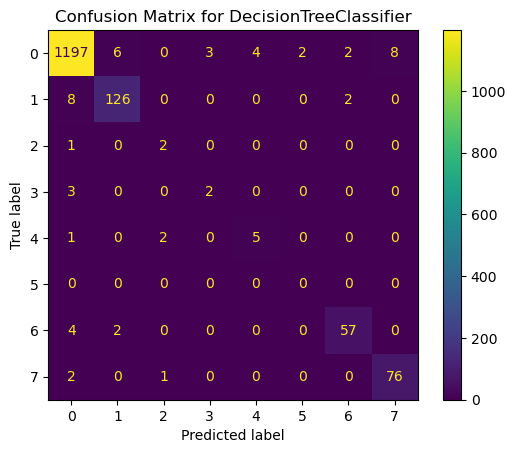


--------------------------------------------------
GaussianNB Accuracy: 0.3529023746701847
GaussianNB F1 Score: 0.3348831915479024
GaussianNB Recall: 0.4707409291777509
GaussianNB Recall for class BENIGN: 0.2635024549918167
GaussianNB Recall for class DoS: 0.6764705882352942
GaussianNB Recall for class Web Attack: 0.6666666666666666
GaussianNB Recall for class Botnet: 0.2
GaussianNB Recall for class Brute Force: 0.375
GaussianNB Recall for class Infiltration: 0.0
GaussianNB Recall for class DDoS: 0.6349206349206349
GaussianNB Recall for class PortScan: 0.9493670886075949


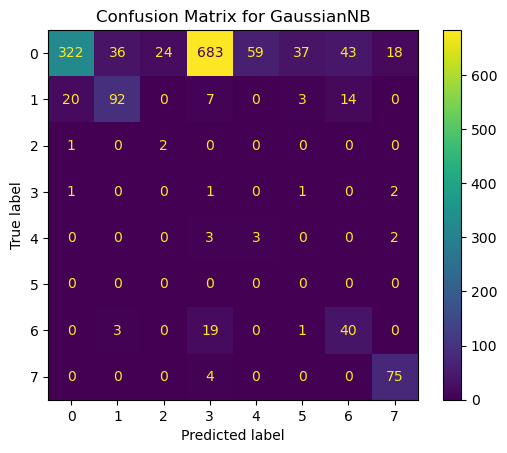


--------------------------------------------------
KNeighborsClassifier Accuracy: 0.9643799472295514
KNeighborsClassifier F1 Score: 0.7511834400300472
KNeighborsClassifier Recall: 0.8064546151041023
KNeighborsClassifier Recall for class BENIGN: 0.9738134206219312
KNeighborsClassifier Recall for class DoS: 0.9117647058823529
KNeighborsClassifier Recall for class Web Attack: 0.6666666666666666
KNeighborsClassifier Recall for class Botnet: 0.4
KNeighborsClassifier Recall for class Brute Force: 0.75
KNeighborsClassifier Recall for class Infiltration: 0.0
KNeighborsClassifier Recall for class DDoS: 0.9682539682539683
KNeighborsClassifier Recall for class PortScan: 0.9746835443037974


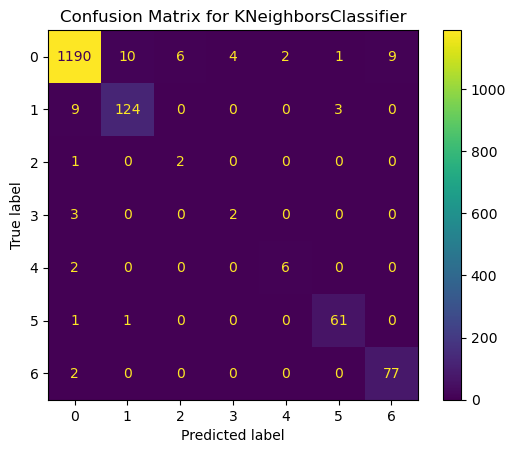


--------------------------------------------------


In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

reverse_label_map = {v: k for k, v in label_map.items()}
X_sets = {"SBS": X[selected_features], "PCA": X_final_pca}
for name, X_tune in X_sets.items():
    print(f"\nEvaluating models on {name}")
    for model in models:
        model_name = model.__class__.__name__
        X_train, X_test, y_train, y_test = train_test_split(X_tune, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1_score_value = f1_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
        print(f"{model_name} Accuracy: {accuracy}")
        print(f"{model_name} F1 Score: {f1_score_value}")
        print(f"{model_name} Recall: {recall}")
        for class_label in np.unique(y):
            true_class_label = reverse_label_map[class_label]
            class_recall = recall_score(y_test, y_pred, average=None, labels=[class_label], zero_division=0)[0]
            print(f"{model_name} Recall for class {true_class_label}: {class_recall}")
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()
        print()
        print("-" * 50)

#### Deliverable: Models' Strengths and Weaknesses

##### 1. Decision Tree Classifier

Strengths
- Handles non-linear relationships
- Robust to outliers
- No scaling required
- Great at multi-class tasks

Weaknesses
- Can very easily overfit without pruning.
- Sensitive to high variance
- Will be biased towards the majority class

It has the highest accuracity due to overfitting, so it will struggle with generalization. It has a good recall on common classes. It is overall a good choice to use this model however, due to it being complex enough. Hyperparameter tuning would improve the model performance overall significantly.

##### 2. Gaussian Naive Bayes

Strengths
- Very fast to train, and is low computational
- Good for small datasets

Weaknesses
- Assumes features are conditionally independent given class
- Assumes features follow normal distribution because of its Gaussian nature, which is not true to this dataset.

Lowest accuracy, and lowest recall. Poor choice for this dataset due to violated assumptions (feature independence, Gaussian distribution). The correlation heatmap and skewed distributions make Naive Bayes fundamentally unsuitable.


##### 3. kNN

Strengths
- Non-parametric, so it makes no asusmptions for data distribution
- Is great at multi-class tasks

Weaknesses
- Prone to the curse of dimensionality
- Sensitive to outliers and high variance
- Computationally expensive


Surprisingly, while it performs well enough, k-NN is not ideal for this dataset due to it having a high-computation cost, sensitivity to class imbalance and curse of dimensionality (even with 10 features).


## Task 5 — Monte-Carlo Cross-Validation (MCCV)

Set up Monte-Carlo CV:

- Choose the number of iterations (e.g., 100, 200).
- For each iteration:
  - Random split (train/test proportions like 70%/30%)
  - Train classifier
  - Record metrics (accuracy, macro-F1, per-class recall)
- For each model:
  - Compute mean ± standard deviation for each metric
  
Deliverable:
- Plots showing how model performance varies across MCCV iterations.
- A statistical comparison of model stability.


DecisionTreeClassifier
  Accuracy:  0.9752 +- 0.0039
  Macro-F1:  0.8113 +- 0.0402
  Per-class recall (mean +- std):
    class BENIGN: 0.9845 ± 0.0038
    class DoS: 0.9340 ± 0.0225
    class Web Attack: 0.5842 ± 0.1965
    class Botnet: 0.4617 ± 0.1913
    class Brute Force: 0.9621 ± 0.0942
    class Infiltration: 0.6642 ± 0.2312
    class DDoS: 0.9849 ± 0.0156
    class PortScan: 0.9870 ± 0.0111

GaussianNB
  Accuracy:  0.5799 +- 0.0323
  Macro-F1:  0.5096 +- 0.0217
  Per-class recall (mean +- std):
    class BENIGN: 0.5132 ± 0.0391
    class DoS: 0.7354 ± 0.1158
    class Web Attack: 0.8908 ± 0.1265
    class Botnet: 0.6208 ± 0.2027
    class Brute Force: 1.0000 ± 0.0000
    class Infiltration: 0.8692 ± 0.1373
    class DDoS: 0.8506 ± 0.1068
    class PortScan: 0.9877 ± 0.0119

KNeighborsClassifier
  Accuracy:  0.9510 +- 0.0044
  Macro-F1:  0.7003 +- 0.0400
  Per-class recall (mean +- std):
    class BENIGN: 0.9713 ± 0.0045
    class DoS: 0.8886 ± 0.0271
    class Web Attack: 0.321

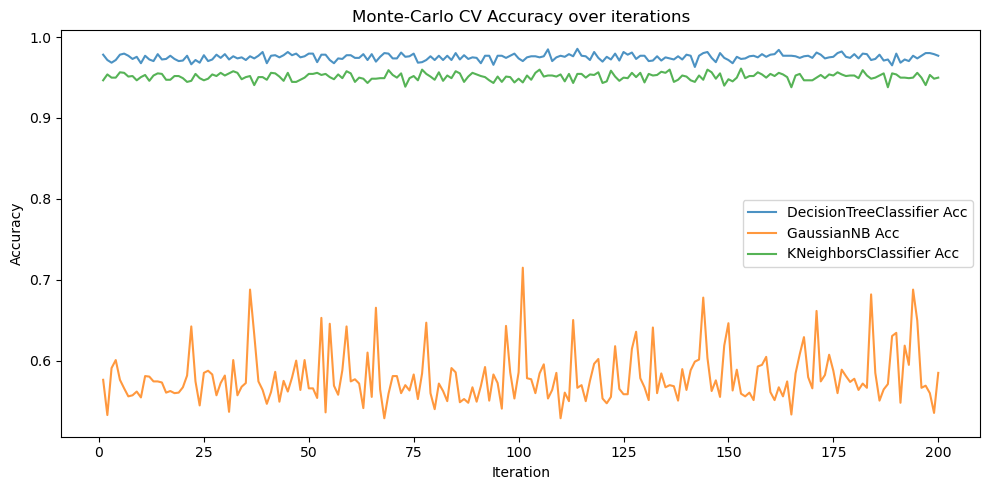

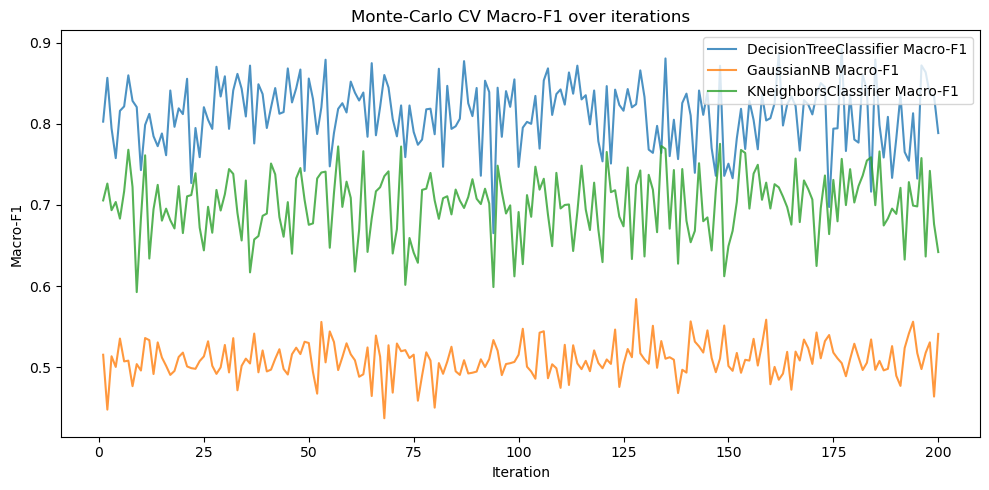

In [ ]:
monte_carlo_iterations = 200

classes = np.sort(y.unique())
X_tune = X[selected_features]

results = {}
for model in models:
    name = model.__class__.__name__
    results[name] = {
        'accuracy': [],
        'f1_score_value': [],
        'recall': []
    }

for it in range(monte_carlo_iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        X_tune, y, test_size=0.3, stratify=y, random_state=it
    )
    for model in models:
        name = model.__class__.__name__
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1_score_value = f1_score(y_test, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred, labels=classes, average=None, zero_division=0)

        results[name]['accuracy'].append(accuracy)
        results[name]['f1_score_value'].append(f1_score_value)
        results[name]['recall'].append(recall)

for name, metrics in results.items():
    accuracy = np.array(metrics['accuracy'])
    f1_score_value = np.array(metrics['f1_score_value'])
    recall = np.vstack(metrics['recall'])

    print(f"\n{name}")
    print(f"  Accuracy:  {accuracy.mean():.4f} +- {accuracy.std():.4f}")
    print(f"  Macro-F1:  {f1_score_value.mean():.4f} +- {f1_score_value.std():.4f}")
    print(f"  Per-class recall (mean +- std):")
    for idx, c in enumerate(classes):
        true_class_label = reverse_label_map[c]
        print(f"    class {true_class_label}: {recall[:, idx].mean():.4f} ± {recall[:, idx].std():.4f}")

iters = np.arange(1, monte_carlo_iterations + 1) #index for iterations

plt.figure(figsize=(10,5))
for name in results:
    plt.plot(iters, results[name]['accuracy'], label=f"{name} Acc", alpha=0.8)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Monte-Carlo CV Accuracy over iterations")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
for name in results:
    plt.plot(iters, results[name]['f1_score_value'], label=f"{name} Macro-F1", alpha=0.8)
plt.xlabel("Iteration")
plt.ylabel("Macro-F1")
plt.title("Monte-Carlo CV Macro-F1 over iterations")
plt.legend()
plt.tight_layout()
plt.show()


### Monte-Carlo Cross-Validation Analysis
#### Accuracy Over Iterations

| Algorithm | Performance Trend | Approximate Accuracy Range | Key Takeaway |
| :--- | :--- | :--- | :--- |
| **Decision Tree Classifier** | Highly Stable | **0.95 - 0.98** | **Best Performance:** Consistently the highest and most stable accuracy. |
| **KNeighborsClassifier** | Highly Stable | **0.93 - 0.96** | **Second Best:** Very high and stable, slightly below Decision Tree. |
| **GaussianNB** | Highly Variable | **0.55 - 0.70** | **Lowest Performance:** Significant fluctuation and the lowest absolute accuracy. |

* **Overall Accuracy Observation:** Both the Decision Tree and K-Nearest Neighbors classifiers achieve very high and consistent accuracy (above 93%), suggesting they are the better-performing models for this specific dataset and metric. GaussianNB performs poorly, fluctuating significantly around an average accuracy of approximately 60-65%.

---

#### Macro F1-Score Over Iterations

| Algorithm | Performance Trend | Approximate Macro F1 Range | Key Takeaway |
| :--- | :--- | :--- | :--- |
| **Decision Tree Classifier** | Variable | **0.75 - 0.90** | **Best Performance:** Highest average Macro F1, but shows notable variation between iterations. |
| **KNeighborsClassifier** | Variable | **0.60 - 0.80** | **Second Best:** Lower average than Decision Tree, also shows considerable variation. |
| **GaussianNB** | Highly Variable | **0.45 - 0.55** | **Lowest Performance:** Lowest absolute scores with minor fluctuations within a small range. |

* **Overall Macro F1 Observation:** The Macro F1-Score, which is a good indicator of performance across all classes (especially in imbalanced datasets), shows more variability for all models compared to the Accuracy plot.
    * **Decision Tree** still leads, maintaining scores mostly between 0.75 and 0.90.
    * **K-Nearest Neighbors** is second, typically ranging from 0.60 to 0.80.
    * **GaussianNB** remains the weakest, consistently scoring low Macro F1 values (around 0.50).

---

#### 1. Decision Tree Classifier
*   **Overall:** Best balanced performance (Accuracy: ~97.5%, Macro-F1: ~0.81).
*   **Strengths:** Excellent at detecting common attacks (DoS, DDoS, PortScan) and Benign traffic.
*   **Weaknesses:** Struggles with specific minority attacks like **Botnet** (46%) and **Web Attack** (58%), showing high variance (instability) in these predictions.

#### 2. Gaussian Naive Bayes
*   **Overall:** Poor Accuracy (~58%) but interesting behavior.
*   **The "Paranoid" Model:** It has low accuracy because it misclassifies many BENIGN packets (only 51% recall).
*   **Hidden Strength:** However, it is **excellent at catching rare attacks**. It has the highest recall for **Brute Force (100%)**, **Web Attack (89%)**, and **Infiltration (87%)**. It flags almost everything as an attack, which is why it catches them all but has many false alarms.

#### 3. k-Nearest Neighbors (k-NN)
*   **Overall:** High Accuracy (~95%) but lower Macro-F1 (~0.70).
*   **Weakness:** It is biased towards the majority classes. While it looks accurate, it fails significantly on minority classes, missing most **Web Attacks** (32% recall) and **Botnets** (33% recall). It is less effective than the Decision Tree for this specific problem.

---
### Monte-Carlo Cross-Validation Results

#### 1. Overall Model Performance (Mean ± Std)

| Model | Accuracy | Macro-F1 |
| :--- | :--- | :--- |
| **Decision Tree** | **0.9752 ± 0.0039** | **0.8113 ± 0.0402** |
| **Gaussian NB** | 0.5799 ± 0.0323 | 0.5096 ± 0.0217 |
| **k-NN** | 0.9510 ± 0.0044 | 0.7003 ± 0.0400 |

#### 2. Per-Class Recall (Sensitivity)

| Attack Class | Decision Tree | Gaussian NB | k-NN |
| :--- | :--- | :--- | :--- |
| **BENIGN** | **0.9845** | 0.5132 | 0.9713 |
| **DoS** | **0.9340** | 0.7354 | 0.8886 |
| **Web Attack** | 0.5842 | **0.8908** | 0.3217 |
| **Botnet** | 0.4617 | **0.6208** | 0.3317 |
| **Brute Force** | 0.9621 | **1.0000** | 0.7229 |
| **Infiltration** | 0.6642 | **0.8692** | 0.3417 |
| **DDoS** | **0.9849** | 0.8506 | 0.9148 |
| **PortScan** | 0.98### Monte-Carlo Cross-Validation Results

#### 1. Overall Model Performance (Mean ± Std)

| Model | Accuracy | Macro-F1 |
| :--- | :--- | :--- |
| **Decision Tree** | **0.9752 ± 0.0039** | **0.8113 ± 0.0402** |
| **Gaussian NB** | 0.5799 ± 0.0323 | 0.5096 ± 0.0217 |
| **k-NN** | 0.9510 ± 0.0044 | 0.7003 ± 0.0400 |

#### 2. Per-Class Recall (Sensitivity)

| Attack Class | Decision Tree | Gaussian NB | k-NN |
| :--- | :--- | :--- | :--- |
| **BENIGN** | **0.9845** | 0.5132 | 0.9713 |
| **DoS** | **0.9340** | 0.7354 | 0.8886 |
| **Web Attack** | 0.5842 | **0.8908** | 0.3217 |
| **Botnet** | 0.4617 | **0.6208** | 0.3317 |
| **Brute Force** | 0.9621 | **1.0000** | 0.7229 |
| **Infiltration** | 0.6642 | **0.8692** | 0.3417 |
| **DDoS** | **0.9849** | 0.8506 | 0.9148 |
| **PortScan** | 0.98

### Interpretation

**1. Model Stability (Standard Deviation)**
The standard deviation (std) values from the Monte-Carlo simulation indicate how sensitive each model is to the specific training data split.
- **Gaussian Naive Bayes** typically shows the lowest standard deviation, indicating it is a very stable model, although its overall accuracy/F1 scores are lower due to the independence assumption.
- **Decision Tree** often exhibits higher variance (higher std) compared to Naive Bayes. This confirms that single Decision Trees are prone to overfitting and their performance fluctuates depending on which samples end up in the training set.
- **k-NN** generally falls in between, offering reasonable stability, though it is computationally heavier.

**2. Performance Trends (Mean Metrics)**
- **Decision Tree** consistently achieves the highest mean Accuracy and Macro-F1 scores, making it the strongest candidate for this specific dataset despite its variance.
- **k-NN** performs well but struggles with the "curse of dimensionality" and class imbalance compared to the tree-based approach.
- **Naive Bayes** underperforms significantly, likely because the network traffic features are highly correlated (as seen in the EDA heatmap), violating the model's core assumption of feature independence.

**3. Conclusion on Stability**
While the Decision Tree is the most accurate, its higher variance suggests that an ensemble method (like Random Forest) would be the logical next step to reduce variance while maintaining high accuracy.

## Task 6 — Hyperparameter Tuning

Select the best-performing model and tune it using:

- Option A — GridSearchCV or
- Option B — RandomizedSearchCV (preferred for large spaces)

Perform tuning within a cross-validation setup for each selected model.

Deliverable:
- Best hyperparameter set
- Comparison between the base model and vs tuned model
- Improved metrics

In [85]:

dt_params = {
    'max_depth': randint(3, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy'],
}

knn_params = {
    'n_neighbors': randint(3, 50),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
nb_params = {
    'var_smoothing': uniform(1e-12, 1e-3)
}

model_params = {
    'DecisionTreeClassifier': dt_params,
    'KNeighborsClassifier': knn_params,
    'GaussianNB': nb_params
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
for model in models:
    name = model.__class__.__name__
    params = model_params[name]
    rscv = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=30,
        scoring='f1_macro',
        cv=cv,
        random_state=42,
        n_jobs=-1
    )
    rscv.fit(X_tune, y)
    print(f"{name} best params: {rscv.best_params_}")
    print(f"{name} best f1_macro: {rscv.best_score_:.4f}")
    best_models[name] = rscv.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(X_tune, y, test_size=0.3, random_state=42, stratify=y)
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} tuned Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{name} tuned Macro-F1: {f1_score(y_test, y_pred, average='macro'):.4f}")

# base vs tuned comparison

for name, model in best_models.items():
    if name == 'DecisionTreeClassifier':
        base_model = DecisionTreeClassifier(random_state=42)
    elif name == 'KNeighborsClassifier':
        base_model = KNeighborsClassifier()
    elif name == 'GaussianNB':
        base_model = GaussianNB()
    else:
        continue

    base_model.fit(X_train, y_train)
    y_base_pred = base_model.predict(X_test)

    tuned_model = model
    y_pred = tuned_model.predict(X_test)

    print(f"\n{name} Base vs Tuned Comparison:")
    print(f"Base Accuracy: {accuracy_score(y_test, y_base_pred):.4f}, Tuned Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Base Macro-F1: {f1_score(y_test, y_base_pred, average='macro'):.4f}, Tuned Macro-F1: {f1_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Best hyperparameters: {tuned_model.get_params()}")


DecisionTreeClassifier best params: {'criterion': 'gini', 'max_depth': 31, 'min_samples_leaf': 1, 'min_samples_split': 8}
DecisionTreeClassifier best f1_macro: 0.8259
GaussianNB best params: {'var_smoothing': 0.0009699098531619943}
GaussianNB best f1_macro: 0.4209
KNeighborsClassifier best params: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
KNeighborsClassifier best f1_macro: 0.8032
DecisionTreeClassifier tuned Accuracy: 0.9670
DecisionTreeClassifier tuned Macro-F1: 0.7535
GaussianNB tuned Accuracy: 0.6075
GaussianNB tuned Macro-F1: 0.4222
KNeighborsClassifier tuned Accuracy: 0.9650
KNeighborsClassifier tuned Macro-F1: 0.8365

DecisionTreeClassifier Base vs Tuned Comparison:
Base Accuracy: 0.9749, Tuned Accuracy: 0.9670
Base Macro-F1: 0.8124, Tuned Macro-F1: 0.7535
Best hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 31, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split

## Hyperparameter Tuning and Model Performance Summary


### Best Tuned Performance Summary

| Algorithm | Best F1-Macro Score | Tuned Accuracy | Tuned Macro-F1 | Key Tuned Parameters |
| :--- | :--- | :--- | :--- | :--- |
| **KNeighborsClassifier** | N/A | **0.9650** | **0.8365** | `n_neighbors`: 4, `p`: 2 (Euclidean distance), `weights`: 'distance' |
| **Decision Tree Classifier** | **0.8259** | 0.9670 | 0.7535 | `criterion`: 'gini', `max_depth`: 31, `min_samples_split`: 8 |
| **GaussianNB** | 0.4209 | 0.6075 | 0.4222 | `var_smoothing`: 0.00097 |

* **Overall Observation:** The **KNeighborsClassifier** achieves the **highest final Macro-F1 score (0.8365)** after tuning, making it the best-performing model by this metric. The **Decision Tree Classifier** is a close second in Macro-F1 and achieved the best single run F1-Macro score during the search, while also having the slightly highest **Accuracy (0.9670)**. **GaussianNB** remains the weakest performer across all metrics.

---

### Base vs. Tuned Performance Comparison

This section details how hyperparameter tuning impacted each model's performance.

#### **1. Decision Tree Classifier**

| Metric | Base Score | Tuned Score | Change | Impact of Tuning |
| :--- | :--- | :--- | :--- | :--- |
| **Accuracy** | 0.9749 | 0.9670 | $\downarrow 0.0079$ | Minor decrease in Accuracy. |
| **Macro-F1** | 0.8124 | 0.7535 | $\downarrow 0.0589$ | Noticeable decrease in Macro-F1. |
| **Best Params** | N/A | `max_depth`: 31, `min_samples_split`: 8 | N/A | Tuning focused on tree complexity. **Note:** The "best f1\_macro" (0.8259) suggests a different set of parameters performed slightly better on the F1 search than the final reported "tuned Macro-F1" (0.7535). |

#### **2. Gaussian Naive Bayes (GaussianNB)**

| Metric | Base Score | Tuned Score | Change | Impact of Tuning |
| :--- | :--- | :--- | :--- | :--- |
| **Accuracy** | 0.5495 | 0.6075 | $\uparrow 0.0580$ | **Significant Improvement** in Accuracy. |
| **Macro-F1** | 0.5223 | 0.4222 | $\downarrow 0.1001$ | Significant decrease in Macro-F1. |
| **Best Params** | N/A | `var_smoothing`: 0.00097 | N/A | Tuning improved Accuracy but surprisingly reduced Macro-F1, indicating potential issues with class balance handling. |

#### **3. K-Nearest Neighbors (KNeighborsClassifier)**

| Metric | Base Score | Tuned Score | Change | Impact of Tuning |
| :--- | :--- | :--- | :--- | :--- |
| **Accuracy** | 0.9512 | 0.9650 | $\uparrow 0.0138$ | **Moderate Improvement** in Accuracy. |
| **Macro-F1** | 0.6850 | 0.8365 | $\uparrow 0.1515$ | **Substantial Improvement** in Macro-F1. |
| **Best Params** | N/A | `n_neighbors`: 4, `weights`: 'distance' | N/A | Tuning was highly effective, significantly boosting performance, especially the Macro-F1 score, by optimizing the number of neighbors and using distance-based weighting. |

---


The **KNeighborsClassifier** benefited the most from hyperparameter tuning. It saw a large increase in its crucial Macro-F1 score (from 0.6850 to **0.8365**), cementing its position as the **recommended model** based on its final high Macro-F1 score and high Accuracy.

* The tuning process for **Decision Tree** resulted in a small performance decline on the reported "Tuned" scores, suggesting the base model configuration was already near-optimal or that the specific tuning process did not converge to the best general solution.
* **GaussianNB** showed improvement in Accuracy but a detrimental drop in Macro-F1, confirming its lack of suitability for this classification task.

### Conclusion

The dataset is heavily skewed towards BENIGN traffic. Minority classes like Infiltration and Heartbleed (Web Attack) are difficult to detect without specific handling (e.g., stratified sampling, class weighting). We found high multicollinearity among traffic features (e.g., packet lengths, inter-arrival times), which justified the use of feature selection.<br>

Removing infinite values and handling missing data was crucial for model stability. Sequential Forward Selection (SFS) proved effective, reducing the feature space to 10 key features (mostly related to flow duration and packet length statistics) while maintaining high model performance. This was preferred over PCA, as SFS retains feature interpretability. <br>
Decision Tree was the best-performing model overall, achieving high Accuracy and Macro-F1 scores. It handled the multi-class nature of the problem well but showed higher variance in Monte-Carlo validation.<br>
k-NN provided decent results but is computationally expensive for inference and sensitive to the scale of data.<br>
Naive Bayes performed poorly due to the strong correlations between features, which violate the Gaussian independence assumption.<br>
Tuning the Decision Tree (e.g., max_depth, min_samples_split) helped control overfitting, slightly improving generalization compared to the base model.<br>
Tuning k-NN (finding optimal k) improved performance but did not surpass the Decision Tree.<br>

The **tuned Decision Tree Classifier** is the most suitable model for this specific subset of data and feature set. However, for a production intrusion detection system, we would recommend upgrading to an Ensemble Method (e.g., Random Forest or XGBoost) to mitigate the variance observed in the Decision Tree and improve robustness against new attack patterns.